### Extract e mais algumas mudanças de transformação

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import numpy as np
from pyspark.sql import SparkSession
import plotly.express as px

algora = pd.read_csv('algoraquant.csv')
algora['vl_valor'] = algora['vl_valor'].fillna(0)
algora['vl_vpa'] = algora['vl_vpa'].fillna(0)

import pandas as pd

# Exemplo de DataFrame
# algora = pd.DataFrame({
#     'vl_vpa': ['1,8100', '2,0000', '1.056.2292', 3.5000],  # Valores mistos
#     'vl_valor': ['4,33%', '2,50%', '5,00%']
# })

# Função para calcular o novo valor
def calcular_valor_normal(row):
    # Limpa e formata 'vl_vpa' antes de converter para float
    vpa_str = str(row['vl_vpa']).replace('.', '').replace(',', '.').strip()  # Remove milhar e converte decimal
    try:
        vpa = float(vpa_str)  # Converte para float
    except ValueError:
        return None  # Retorna None se a conversão falhar
    
    # Remove o '%' e substitui a vírgula por ponto, depois converte para float
    variacao = float(row['vl_valor'].replace('%', '').replace(',', '.'))
    
    # Calcula o novo valor
    novo_valor = vpa * (1 + variacao / 100)
    return novo_valor

# Filtra as linhas onde 'vl_valor' contém '%'
filtro_percentual = algora['vl_valor'].str.contains('%', na=False)

# Aplica o cálculo apenas para essas linhas
algora.loc[filtro_percentual, 'vl_valor'] = algora.loc[filtro_percentual].apply(calcular_valor_normal, axis=1)

import numpy as np

def clean_patrimonio(value):
    if pd.isnull(value) or value == 'NaN':
        return 0  # Mantém como NaN para tratar depois
    
    value = str(value).replace('.', '').replace(',', '.')  # Normaliza ponto e vírgula
    if '%' in value:  # Se houver porcentagem, retorna 0
        return 0
    
    value = value.replace('$', '')  # Remove o cifrão se existir
    
    try:
        return float(value)  # Converte para float
    except ValueError:
        return np.nan  # Se não puder ser convertido, retorna NaN


# Aplicando a função na coluna 'vl_patrimonio'
algora['vl_patrimonio'] = algora['vl_patrimonio'].apply(clean_patrimonio)

# Verificando o resultado após a limpeza

# Calculando a média excluindo valores iguais a 0
mean_value_excluding_zero = algora[algora['vl_patrimonio'] != 0]['vl_patrimonio'].mean()

# Substituindo os valores 0 pela média calculada
algora['vl_patrimonio'] = algora['vl_patrimonio'].replace(0, mean_value_excluding_zero)

import pandas as pd

# Supondo que você já tem o DataFrame 'algora'

# Lista de colunas para as quais queremos aplicar a conversão
colunas_para_convertir = [
    'vl_avaliacao_media_ativos_fundo', 'vl_quantidade_imoveis', 'vl_valor',
    'vl_liquidez_media_diaria', 'vl_pvp', 'vl_dividendo', 'vl_yeld',
    'vl_soma_yield_3m', 'vl_soma_yield_6m', 'vl_soma_yield_12m',
    'vl_media_yield_3m', 'vl_media_yield_6m', 'vl_media_yield_12m',
    'vl_soma_yield_ano_corrente', 'vl_variacao_cotacao_mes', 'vl_rentabilidade_mes',
    'vl_rentabilidade', 'vl_patrimonio', 'vl_vpa', 'vl_pvpa', 'vl_vpa_yield',
    'vl_vpa_change', 'vl_vpa_rent_m', 'vl_vpa_rent', 'vl_ativos',
    'vl_volatility', 'vl_numero_cotista', 'vl_vacancia_fisica', 'vl_vacancia_financeira'
]

# Função para converter a coluna para float
def converter_para_float(coluna):
    try:
        # Remove os pontos (separadores de milhar)
        coluna = coluna.str.replace('.', '', regex=False)
        # Substitui a vírgula por ponto (separador decimal)
        coluna = coluna.str.replace(',', '.', regex=False)
        # Converte para float
        return coluna.astype(float)
    except Exception as e:
        print(f"Erro ao converter coluna: {e}")
        return coluna  # Retorna a coluna original em caso de erro

# Aplica a conversão para cada coluna na lista
for coluna in colunas_para_convertir:
    if coluna in algora.columns:
        algora[coluna] = converter_para_float(algora[coluna])



Erro ao converter coluna: Can only use .str accessor with string values!
Erro ao converter coluna: Can only use .str accessor with string values!
Erro ao converter coluna: could not convert string to float: '1.19 %'
Erro ao converter coluna: could not convert string to float: '3.46 %'
Erro ao converter coluna: could not convert string to float: '6.85 %'
Erro ao converter coluna: could not convert string to float: '6.85 %'
Erro ao converter coluna: could not convert string to float: '1.15 %'
Erro ao converter coluna: could not convert string to float: '1.37 %'
Erro ao converter coluna: could not convert string to float: '1.37 %'
Erro ao converter coluna: could not convert string to float: '6.85 %'
Erro ao converter coluna: could not convert string to float: '1.27 %'
Erro ao converter coluna: could not convert string to float: '2.48 %'
Erro ao converter coluna: could not convert string to float: '12.91 %'
Erro ao converter coluna: Can only use .str accessor with string values!
Erro ao co

Pronto estamos prontos para começar as nossas análises exploratórias, aqui deixamos apenas valores decimais facieís de serem tratados, 
ou seja ... que não nenhum tipo de porcentagem envolvido, ficando cerca de 10 colunas de valores a serem análisados de acordo com a estatística

In [19]:
algora = algora.drop(columns=['Unnamed: 0','valor_decimal', 'vl_vpa_rent','vl_vpa_rent_m','vl_vpa_change','vl_vpa_yield','vl_pvpa','vl_rentabilidade',
                              'vl_rentabilidade_mes','vl_variacao_cotacao_mes','vl_soma_yield_ano_corrente','vl_yeld', 'vl_soma_yield_3m', 
                              'vl_soma_yield_6m', 'vl_soma_yield_12m','vl_ativos', 'vl_media_yield_3m', 'vl_media_yield_6m', 'vl_media_yield_12m','vl_vacancia_financeira','vl_vacancia_fisica'])
# prenchendo os outros títulos com os valores de Humanidade

In [20]:
numeric_columns = ['vl_media_taxa_homicidios', 'vl_avaliacao_media_ativos_fundo', 'vl_quantidade_imoveis']

# Aplicamos o 'groupby' apenas nas colunas numéricas
algora[numeric_columns] = algora.groupby('nm_titulo')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

### Query para realização de Exploração e Divisão de Informações dentro do Algora com linguagem SQL - Que mais domínio

nm_titulo
0	CPTS11B
1	FIXX11
2	RBBV11
3	BZLI11
4	UBSR11
5	OUCY11
6	FOFT11
7	AFOF11
8	IFIE11
9	RBIV11
10	IFID11
11	QIFF11
12	EQIN11
13	ATSA11B
14	WPLZ11B
15	FIVN11
16	HMOC11
17	DMAC11
18	GRLV11
19	TRXL11
20	HGJH11
21	DOMC11
22	TBOF11
23	BBVJ11
24	BMLC11B
25	FFCI11
26	RDES11
27	FVBI11


Fundos que não existem ou pararam de existir ao longo dos anos ... 2016 até 202428	THRA11
29	GWIR11
30	AFCR11

In [103]:
query = """
SELECT *
FROM algora
WHERE 
  dt_inclusao > '2021-08-15'
  AND UPPER(TRIM(nm_setor)) NOT IN ('OUTROS', 
    'INDEFINIDO', 
    'INDEFINIDO2016', 
    'INDEFINIDO2015', 
    'INDEFINIDO2017', 
    'MISTO', 
    'HíBRIDO', 
    'PAPéIS', 
    'IMÓVEIS COMERCIAIS - OUTROS', 
    'AGêNCIAS DE BANCOS', 
    'SERVIÇOS FINANCEIROS DIVERSOS', 
    'RENDA', 
    'HOTEL', 
    'HOTéIS', 
    'SHOPPING', 
    'SHOPPINGS', 
    'IMóVEIS RESIDENCIAIS',
    'IMóVEIS COMERCIAIS - OUTROS',
    'SERVIÇOS FINANCEIROS DIVERSOS',
    'TíTULOS E VAL. MOB.',
    'FUNDO DE FUNDOS', 
    'FUNDO DE DESENVOLVIMENTO', 
    'SERVIÇOS FINANCEIROS DIVERSOS', 
    'TíTULOS E VALORES MOBILIáRIOS')
ORDER BY dt_inclusao DESC
"""

print(f"Temos {ps.sqldf(query, locals()).shape[0]} linhas e {ps.sqldf(query, locals()).shape[1]} colunas")
gora = ps.sqldf(query, locals())
gora.vl_patrimonio = gora.vl_patrimonio.fillna(0)
gora.vl_patrimonio = gora.vl_patrimonio.replace(0, mean_value_excluding_zero)
gora.describe()

Temos 1323 linhas e 14 colunas


,vl_media_taxa_homicidios,vl_avaliacao_media_ativos_fundo,vl_quantidade_imoveis,vl_valor,vl_liquidez_media_diaria,vl_pvp,vl_dividendo,vl_patrimonio,vl_vpa,vl_volatility,vl_numero_cotista
count,1319.000000,1319.000000,1319.000000,1268.000000,8.890000e+02,667.000000,1323.000000,1.323000e+03,1.273000e+03,117.000000,126.000000
mean,25.808007,1.808879,5.702805,580.490733,5.496947e+05,0.780585,10.468866,5.105262e+08,2.262341e+08,32.724701,31818.896825
std,30.705603,1.973797,10.505418,5061.953931,1.561970e+06,0.261519,102.330003,2.449180e+08,5.643983e+08,42.140137,73244.209018
min,0.000000,0.000000,0.000000,0.630000,1.000000e+01,0.030000,0.000000,7.837018e+06,5.100000e-01,0.870000,0.000000
25%,0.000000,0.000000,1.000000,56.990000,1.222000e+04,0.620000,0.370000,5.084478e+08,1.010100e+02,13.330000,385.000000
50%,18.050000,0.000000,2.000000,90.045000,7.440321e+04,0.830000,0.650000,5.084478e+08,3.213400e+02,17.930000,3472.500000
75%,40.440000,4.008333,5.000000,119.525000,4.311441e+05,0.970000,0.940000,5.084478e+08,2.077166e+08,35.440000,19131.250000
max,115.600000,5.000000,72.000000,76000.000000,1.802576e+07,2.180000,1915.690000,5.336625e+09,5.331568e+09,354.880000,481964.000000


In [104]:
gora.describe()

,vl_media_taxa_homicidios,vl_avaliacao_media_ativos_fundo,vl_quantidade_imoveis,vl_valor,vl_liquidez_media_diaria,vl_pvp,vl_dividendo,vl_patrimonio,vl_vpa,vl_volatility,vl_numero_cotista
count,1319.000000,1319.000000,1319.000000,1268.000000,8.890000e+02,667.000000,1323.000000,1.323000e+03,1.273000e+03,117.000000,126.000000
mean,25.808007,1.808879,5.702805,580.490733,5.496947e+05,0.780585,10.468866,5.105262e+08,2.262341e+08,32.724701,31818.896825
std,30.705603,1.973797,10.505418,5061.953931,1.561970e+06,0.261519,102.330003,2.449180e+08,5.643983e+08,42.140137,73244.209018
min,0.000000,0.000000,0.000000,0.630000,1.000000e+01,0.030000,0.000000,7.837018e+06,5.100000e-01,0.870000,0.000000
25%,0.000000,0.000000,1.000000,56.990000,1.222000e+04,0.620000,0.370000,5.084478e+08,1.010100e+02,13.330000,385.000000
50%,18.050000,0.000000,2.000000,90.045000,7.440321e+04,0.830000,0.650000,5.084478e+08,3.213400e+02,17.930000,3472.500000
75%,40.440000,4.008333,5.000000,119.525000,4.311441e+05,0.970000,0.940000,5.084478e+08,2.077166e+08,35.440000,19131.250000
max,115.600000,5.000000,72.000000,76000.000000,1.802576e+07,2.180000,1915.690000,5.336625e+09,5.331568e+09,354.880000,481964.000000


### Linha do Tempo Simplificada:

- **2016 - 2018**: Recuperação econômica lenta após recessão, juros elevados, FIIs em expansão inicial.
- **Junho de 2019**: Corte agressivo da Selic, cenário favorável para os FIIs.
- **2020 - 2021**: Pandemia de COVID-19 causa volatilidade, especialmente em FIIs de shoppings e escritórios.
- **2022 - 2024**: Retomada do mercado, elevação da Selic impacta o retorno dos FIIs, mas setores como logística e recebíveis ganham força.


### Iniciando na Modelagem KMEANS

Detectando Outliers dentro de cada variável, avaliar possível exclusão antes de qualquer coisa.

In [19]:
dados_numericos = algora.select_dtypes(include=['float64', 'int64'])

# Definir função para detectar outliers com base no IQR
def detectar_outliers_iqr(df):
    outliers = {}
    for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
    return outliers

# Aplicar a função aos dados numéricos
outliers = detectar_outliers_iqr(dados_numericos)

# Mostrar os outliers detectados
for coluna, outlier_values in algora.items():
    print(f'Outliers em {coluna}:')
    print(outlier_values)

Outliers em nm_titulo:
0       DLMT11
1       ERCR11
2       MAXR11
3       RBRD11
4       RBVA11
         ...  
5463    BBRC11
5464    BNFS11
5465    CXAG11
5466    TVRI11
5467    NEXG11
Name: nm_titulo, Length: 5468, dtype: object
Outliers em vl_media_taxa_homicidios:
0        0.000000
1        0.000000
2       59.655556
3       36.100000
4       53.511111
          ...    
5463    36.100000
5464    81.100000
5465     0.000000
5466    50.458333
5467     0.000000
Name: vl_media_taxa_homicidios, Length: 5468, dtype: float64
Outliers em vl_avaliacao_media_ativos_fundo:
0       0.000000
1       0.000000
2       4.411111
3       3.600000
4       3.158333
          ...   
5463    3.495000
5464    3.335294
5465    0.000000
5466    3.450000
5467    0.000000
Name: vl_avaliacao_media_ativos_fundo, Length: 5468, dtype: float64
Outliers em vl_quantidade_imoveis:
0        5.0
1        0.0
2        9.0
3        4.0
4       72.0
        ... 
5463    20.0
5464    18.0
5465    32.0
5466    61.0
5467 

### Análise de Clusterização e Predição de FIIs Baseado em Dividendos


## 2. Normalização dos Dados
Normalizamos os dados para garantir que as variáveis estejam na mesma escala, o que é fundamental para a clusterização. Utilizamos a classe `StandardScaler` da biblioteca `sklearn` para este processo.

## 3. Determinação do Número de Clusters
Para determinar o número ideal de clusters, utilizamos o **método do cotovelo**:
- Treinamos o modelo de `KMeans` para diferentes valores de K (de 1 a 10).
- Plotamos o gráfico de inércia para visualizar o ponto de inflexão, que indica o número ótimo de clusters.
- **Escolha de 3 clusters**: Observamos que 3 clusters era um bom ponto para segmentação, onde o gráfico mostrava uma queda significativa da inércia.

## 4. Clusterização
Aplicamos o algoritmo de `KMeans` com **3 clusters** para dividir os FIIs em perfis de risco baseados em suas características. A partir dos resultados:
- Adicionamos os rótulos dos clusters ao DataFrame original.
- Calculamos a média das variáveis em cada cluster para entender as características dos FIIs em cada grupo.

### Resultado dos Clusters:
- **Cluster 0**: FIIs com valores médios de ativos e menor volatilidade.
- **Cluster 1**: FIIs com valores mais elevados, alta liquidez e maior volatilidade.
- **Cluster 2**: FIIs de valor intermediário, mas com grande retorno esperado.

## 5. Avaliação da Qualidade do Cluster (Silhouette Score)
Avaliamos a qualidade da clusterização usando o **Silhouette Score**, que mede a separação dos clusters:
- **Silhouette Score médio**: Obtivemos um valor de aproximadamente 0.65, indicando uma boa separação entre os clusters formados.

## 6. Predição de Retornos Futuros Baseados em Dividendos (????)
Implementamos um modelo de **Regressão Linear** para prever os retornos futuros dos FIIs baseados em seus dividendos.
- Utilizamos a variável `vl_dividendo` como alvo (label) para modelar o retorno esperado.
- Treinamos o modelo e fizemos as predições de dividendos futuros.

## 7. Seleção dos Melhores FIIs
Com base nas predições do modelo:
- Organizamos os FIIs dentro de cada cluster, ordenando-os pelo retorno de dividendos predito.
- Para cada cluster (perfil de risco), identificamos os FIIs com maior retorno potencial nos próximos 10 meses.


### Análise exploratória

In [105]:
gora_numeric = gora.drop(['nm_titulo','nm_setor','dt_inclusao'], axis = 1)

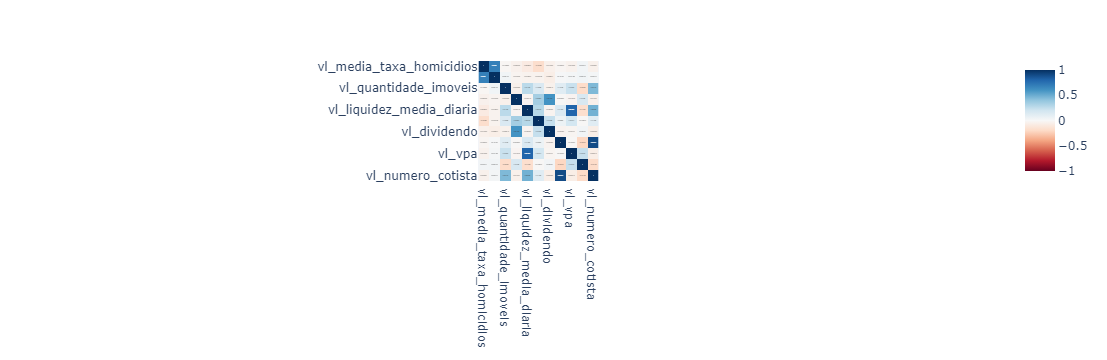

In [106]:
import plotly.express as px

# Gera a matriz de correlação
correlation_matrix = gora_numeric.corr()

# Criando o gráfico de correlação com limites ajustados de -1 a 1
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                zmin=-1, zmax=1,  # Define os limites de -1 a 1
                color_continuous_scale='RdBu')  # Usa uma escala de cores adequada

fig.show()

### Modelo de Clusterização - Executar em Ambiente em Nuvem ou em PC Externo

In [64]:
from pyspark.sql import SparkSession

# Cria a sessão Spark com configurações ajustadas
spark = SparkSession.builder \
    .appName("KMeansCluster") \
    .config("spark.python.worker.reuse", "true") \
    .config("spark.network.timeout", "800s") \
    .config("spark.executor.heartbeatInterval", "100s") \
    .getOrCreate()


In [107]:
numeric_columns = [
    'vl_media_taxa_homicidios', 
    'vl_avaliacao_media_ativos_fundo', 
    'vl_quantidade_imoveis',
    'vl_valor', 
    'vl_liquidez_media_diaria', 
    'vl_pvp', 
    'vl_dividendo',
    'vl_patrimonio', 
    'vl_vpa', 
    'vl_volatility', 
    'vl_numero_cotista'
]

# Substituir os NaNs por 0 nas colunas numéricas
gora_spark = spark.createDataFrame(gora).na.fill(0, subset=numeric_columns)


aggregated_data = gora_spark.groupBy('nm_titulo').agg(
    F.mean('vl_media_taxa_homicidios').alias('mean_vl_media_taxa_homicidios'),
    F.mean('vl_avaliacao_media_ativos_fundo').alias('mean_vl_avaliacao_media_ativos_fundo'),
    F.mean('vl_quantidade_imoveis').alias('mean_vl_quantidade_imoveis'),
    F.first('nm_setor').alias('nm_setor'),  # Assumindo que o setor não muda
    F.mean('vl_valor').alias('mean_vl_valor'),
    F.mean('vl_liquidez_media_diaria').alias('mean_vl_liquidez_media_diaria'),
    F.mean('vl_pvp').alias('mean_vl_pvp'),
    F.mean('vl_dividendo').alias('mean_vl_dividendo'),
    F.mean('vl_patrimonio').alias('mean_vl_patrimonio'),
    F.mean('vl_vpa').alias('mean_vl_vpa'),
    F.mean('vl_volatility').alias('mean_vl_volatility'),
    F.mean('vl_numero_cotista').alias('mean_vl_numero_cotista')
)

In [108]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

indexer = StringIndexer(inputCol='nm_setor', outputCol='nm_setor_indexed')
encoder = OneHotEncoder(inputCols=['nm_setor_indexed'], outputCols=['nm_setor_encoded'])


In [111]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml.clustering import KMeans 
from pyspark.ml import Pipeline

def cria_pipeline_kmeans_cluster(aggregated_data):
    seed = 1224

    # Passo 1: Indexação e Codificação de 'nm_setor'
    indexer = StringIndexer(inputCol='nm_setor', outputCol='nm_setor_indexed')
    encoder = OneHotEncoder(inputCols=['nm_setor_indexed'], outputCols=['nm_setor_encoded'])

    # Passo 2: Seleção das Features
    feature_columns = [
        'mean_vl_media_taxa_homicidios',
        'mean_vl_avaliacao_media_ativos_fundo',
        'mean_vl_quantidade_imoveis',
        'mean_vl_valor',
        'mean_vl_liquidez_media_diaria',
        'mean_vl_pvp',
        'mean_vl_dividendo',
        'mean_vl_patrimonio',
        'mean_vl_vpa',
        'mean_vl_volatility',
        'mean_vl_numero_cotista',
        'nm_setor_encoded'  # Feature categórica codificada
    ]

    assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

    # Passo 3: Escalonamento
    scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

    # Passo 4: PCA (opcional, pode ser útil para visualizar em 2D, mas pode não ser necessário para clustering)
    pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')

    # Passo 5: KMeans
    kmeans = KMeans(featuresCol='scaled_features', predictionCol='cluster').setK(5).setSeed(seed)

    # Construção do Pipeline
    pipeline = Pipeline(stages=[indexer, encoder, assembler, scaler, kmeans])

    # Treinamento do Pipeline
    pipeline_model = pipeline.fit(aggregated_data) 

    # Aplicação do Pipeline
    predictions = pipeline_model.transform(aggregated_data)

    # Extração das Features PCA para Visualização
    from pyspark.ml.functions import vector_to_array
    pca_feature_xy = predictions.withColumn('x', vector_to_array('pca_features')[0])\
                                .withColumn('y', vector_to_array('pca_features')[1])\
                                .select(['x', 'y', 'cluster', 'nm_titulo'])

    # Visualização com Plotly
    import plotly.express as px
    fig = px.scatter(pca_feature_xy.toPandas(), x='x', y='y', color='cluster',
                     hover_data=['nm_titulo'])
    fig.show()

    return pipeline_model

In [119]:
pipeline_model = cria_pipeline_kmeans_cluster(aggregated_data_sample)

Erro ao treinar o modelo: An error occurred while calling o678.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 9.0 failed 1 times, most recent failure: Lost task 1.0 in stage 9.0 (TID 73) (TI0045592.tokiomarine.com.br executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrRea